In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 데이터 불러오기
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/부동산실습/train.csv')

In [ ]:
data

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,TRAIN_2447,서류확인,159000000.0,550000,48.95,3.0,3.0,남향,2.0,1.0,불가능,NaN,0,d22DX4Y4P8,B플랫폼,2024-11-16,0
2448,TRAIN_2448,서류확인,158500000.0,750000,NaN,2.0,4.0,남향,1.0,1.0,불가능,NaN,2,g99sy3I3R8,A플랫폼,2024-10-06,0
2449,TRAIN_2449,전화확인,329000000.0,610000,17.50,8.0,20.0,남서향,1.0,1.0,가능,29.0,10,G52Iz8V2B9,B플랫폼,2024-05-15,0
2450,TRAIN_2450,현장확인,31000000.0,400000,22.87,8.0,9.0,남동향,2.0,1.0,가능,NaN,8,m69GM9O9B3,B플랫폼,2024-08-06,0


Dataset
<br>해당 데이터셋의 경우 총 16개의 열과 1개의 Target으로 이루어져 있음<br>
<br>실제 사용할 열은 ID열을 제외한 15개의 열 <br>
Target의 경우 [0, 1] 의 이진 데이터로 이루어져 있음

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [ ]:
# 피처 요약표
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values  # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None

    for col in df.columns:
        if 'bin' in col or col == '허위매물여부' :
            summary.loc[col, '데이터 종류'] = '이진형'

        elif df[col].dtype == object:
            summary.loc[col, '데이터 종류'] = '명목형'

        elif df[col].dtype == float :
            summary.loc[col, '데이터 종류'] = '연속형'

        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [ ]:
summary = resumetable(data)
summary

데이터셋 형상: (2452, 17)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
ID,object,0,2452,명목형
매물확인방식,object,0,3,명목형
보증금,float64,0,426,연속형
월세,int64,0,76,순서형
전용면적,float64,0,800,연속형
해당층,float64,0,21,연속형
총층,float64,0,20,연속형
방향,object,0,8,명목형
방수,float64,0,2,연속형
욕실수,float64,0,2,연속형


<b>Numerical Feature</b>
<br> 보증금 , 월세, 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수, 관리비 (9개)
<br> <b>Categorical Feature</b>
<br> 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼, 게재일 (6개)
<br> <b>Target</b>
<br> 허위매물여부 [0,1]

<ipython-input-7-7294c80d9449>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='허위매물여부', data=data, palette="coolwarm")


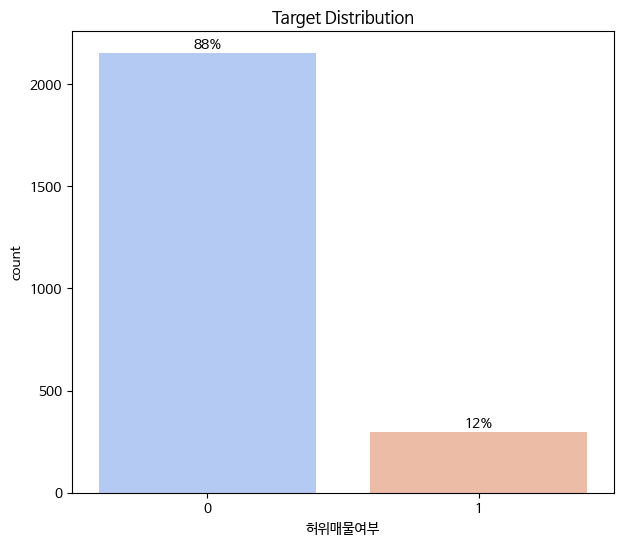

In [ ]:
# Target 확인 / % 정리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

mpl.rc('font', size = 10) # 폰트 크기 설정
plt.figure(figsize = (7,6))  # Figure 크기 설정

ax = sns.countplot(x='허위매물여부', data=data, palette="coolwarm")
ax.set_title('Target Distribution')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2.0, height, "%0.f%%" % (height/len(data['허위매물여부'])*100), ha='center', va='bottom', size = 10)

Target 9:1로 데이터 불균형 상태 실제 1을 검출이 중요함

In [ ]:
# 숫자 표시
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

In [ ]:
# 각 비율별로 target이 어떻게 들어가있는지 확인
def get_crosstab(df, feature):
  crosstab = pd.crosstab(df[feature], df['허위매물여부'], normalize = 'index') * 100
  crosstab = crosstab.reset_index()
  return crosstab

In [ ]:
# plot_pointplot(): 이미 카운트플롯이 그려진 축에 포인트플롯을 중복으로 그림

def plot_pointplot(ax, feature, crosstab):
  ax2 = ax.twinx()  # twinx: x축은 공유하고 y축은 공유하지 않는 새로운 축 생성

  # 새로운 축에 포인트플롯 그리기
  ax2 = sns.pointplot(x = feature, y=1, data = crosstab,
                      order = crosstab[feature].values,  # 포인트플롯 순서
                      color = 'black',
                      legend = False)
  ax2.set_ylim(crosstab[1].min() - 5, crosstab[1].max() * 1.1)  # y축 범위 설정
  ax2.set_ylabel('Target 1 Ratio(%)')

In [ ]:
import matplotlib.gridspec as gridspec

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols,
                                  size = (20, 15)):
    plt.figure(figsize = size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시

        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기

        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


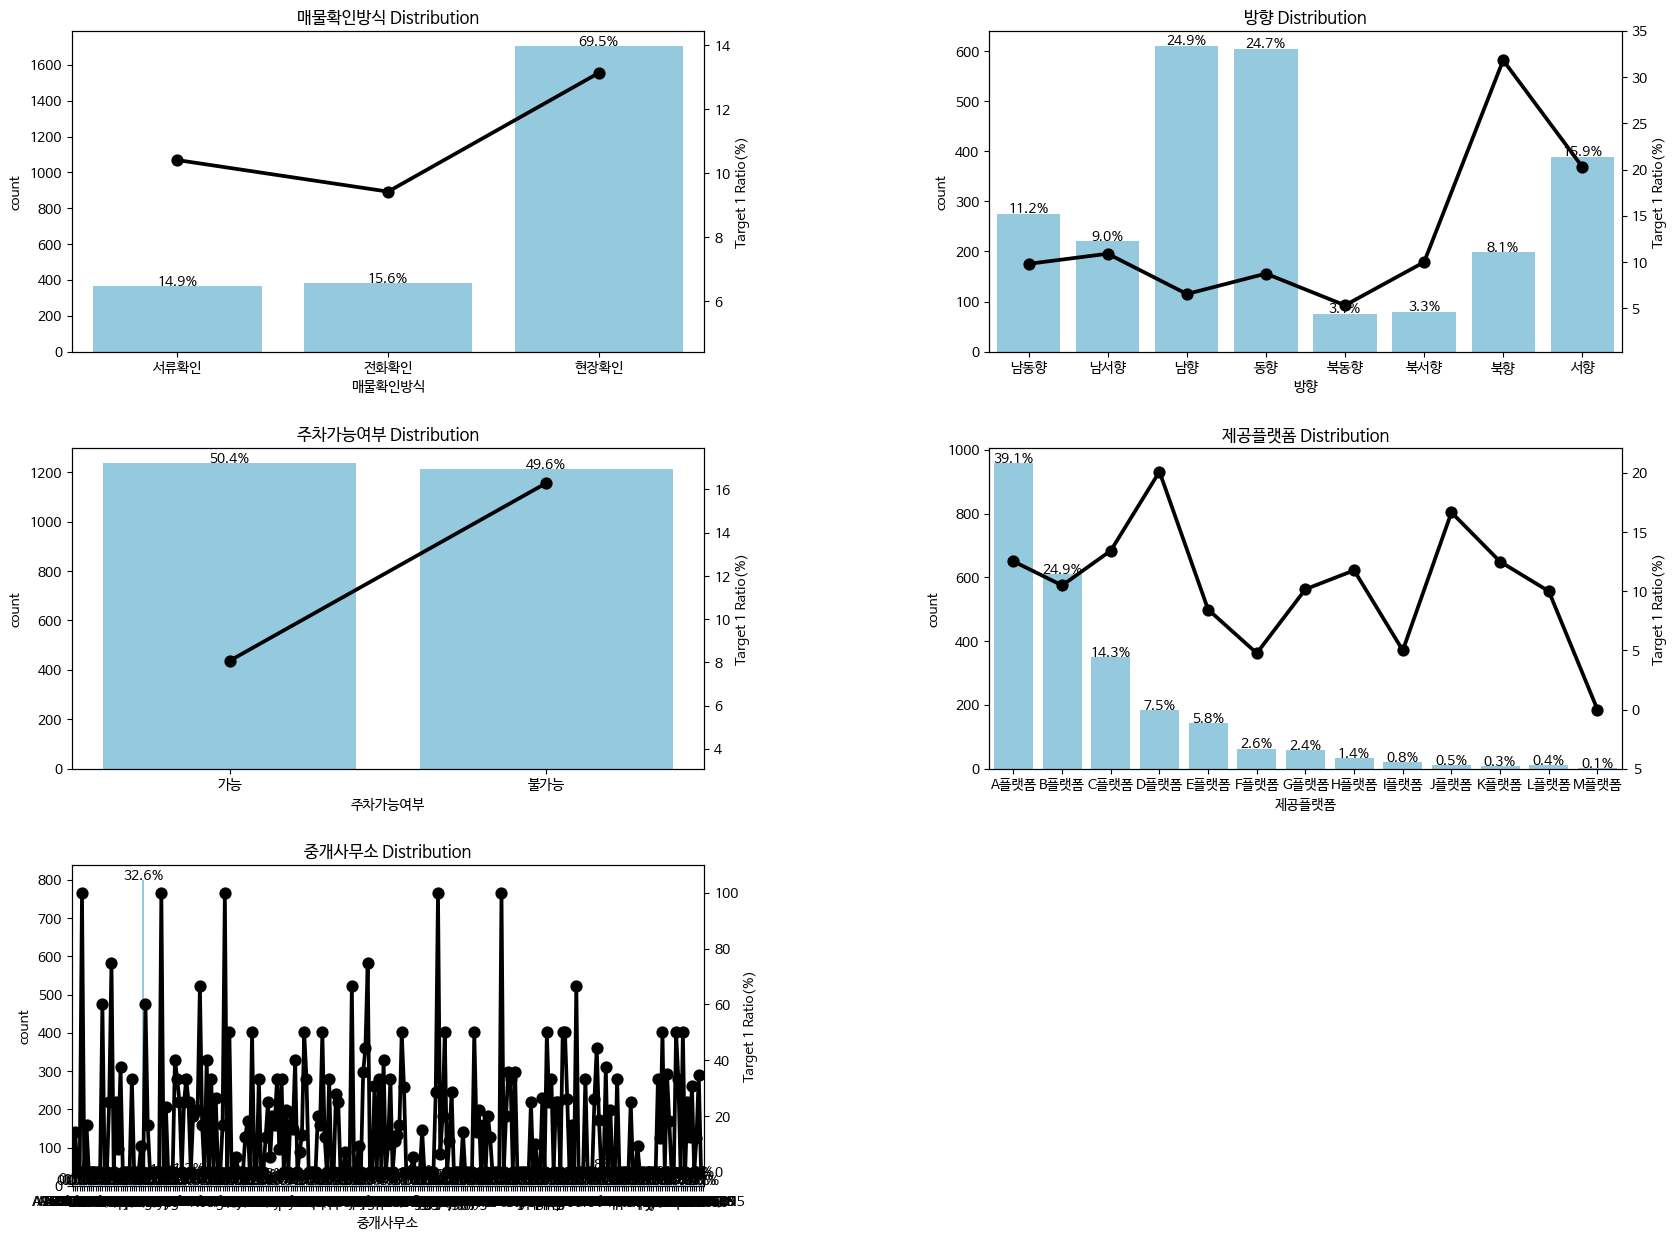

In [ ]:
# feature categorical 표
nom_features = ['매물확인방식', '방향', '주차가능여부','제공플랫폼','중개사무소' ] # Categorical feature
plot_cat_dist_with_true_ratio(data, nom_features, num_rows=3, num_cols=2)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


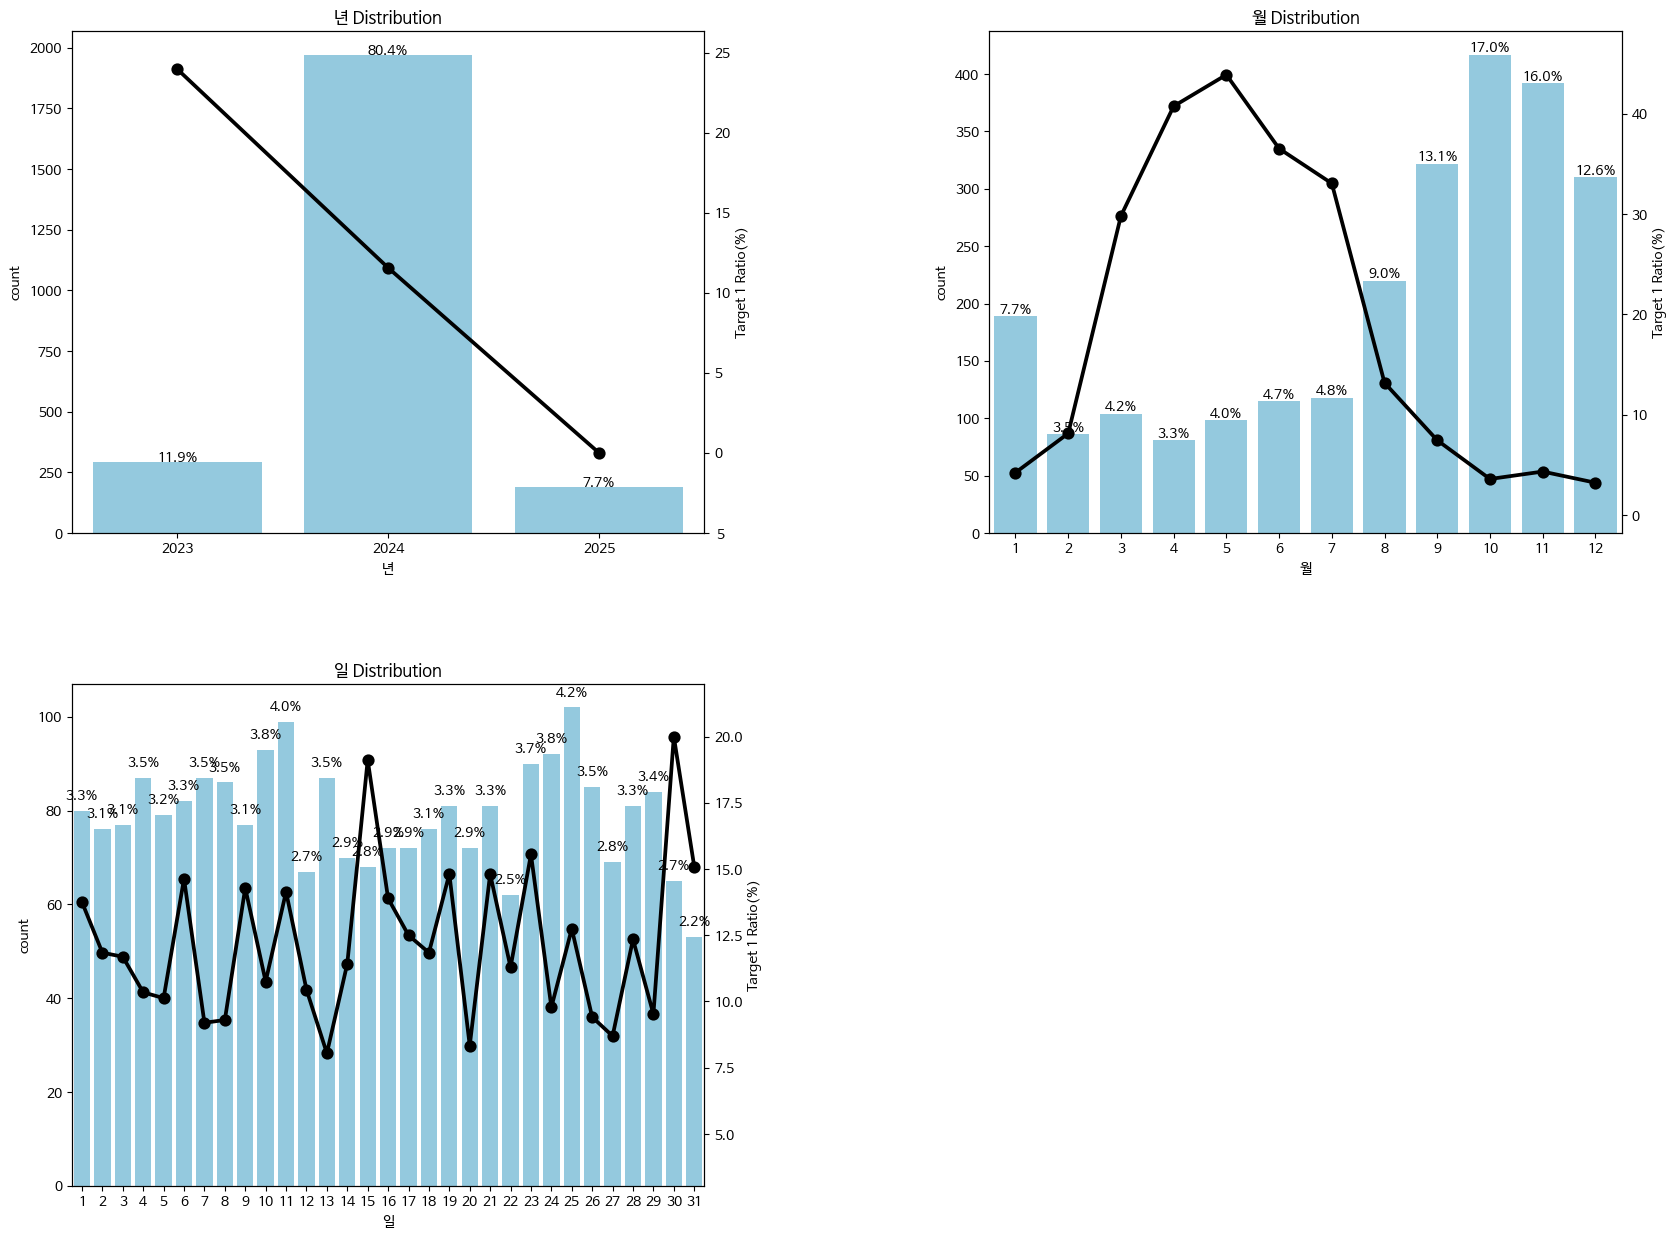

In [ ]:
# 게재일 년 , 월, 일로 분석
df = data.copy()

# # 2️⃣ 기준 시작 날짜 설정 (최소 날짜를 기준으로 2주 단위로 구분)
df['년'] = pd.to_datetime(df['게재일']).dt.year
df['월'] = pd.to_datetime(df['게재일']).dt.month
df['일'] = pd.to_datetime(df['게재일']).dt.day

nom_features = ['년','월','일' ] # Categorical feature
plot_cat_dist_with_true_ratio(df, nom_features, num_rows=2, num_cols=2)

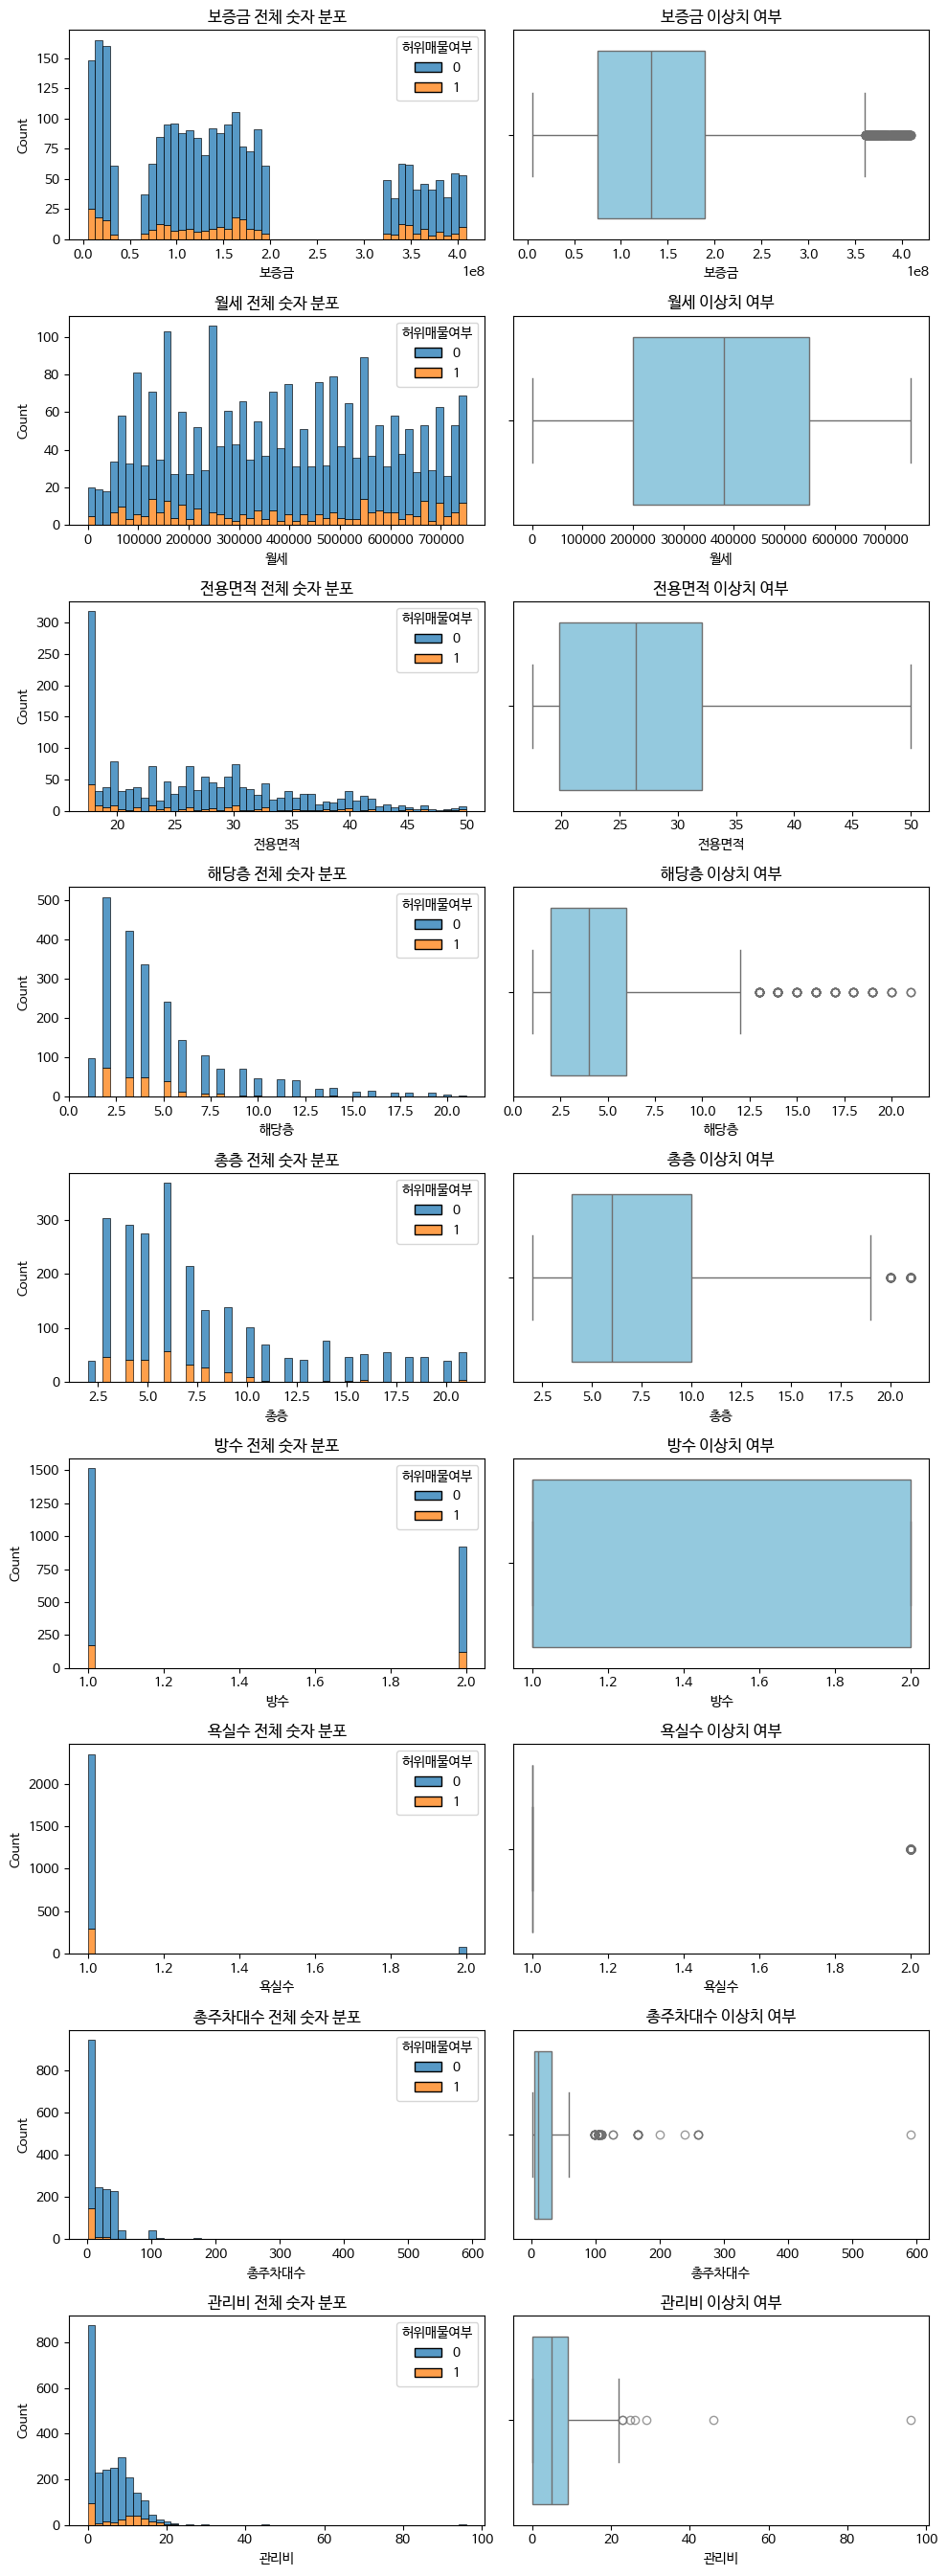

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 비교할 연속형 변수 리스트
continuous_features = ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비']

# 사용자가 설정할 행과 열 개수
n_rows = len(continuous_features)  # 변수 개수만큼 행 설정
n_cols = 2  # 2개의 컬럼 (히스토그램 + 박스플롯)

# 서브플롯 생성 (n_rows x 2)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))

# 변수 개수만큼 히스토그램 & 박스플롯 그리기
for i, feature in enumerate(continuous_features):
    # 🎯 히스토그램 (왼쪽 열) - 허위매물 여부 색상 구분
    sns.histplot(data=data, x=feature, bins=50, kde=False, hue="허위매물여부", multiple="stack", ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} 전체 숫자 분포')

    # 🎯 박스플롯 (오른쪽 열) - 이상치 빨간색으로 강조
    sns.boxplot(x=data[feature], ax=axes[i, 1], color='skyblue', flierprops=dict(marker='o', color='red', alpha=0.7))
    axes[i, 1].set_title(f'{feature} 이상치 여부')

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


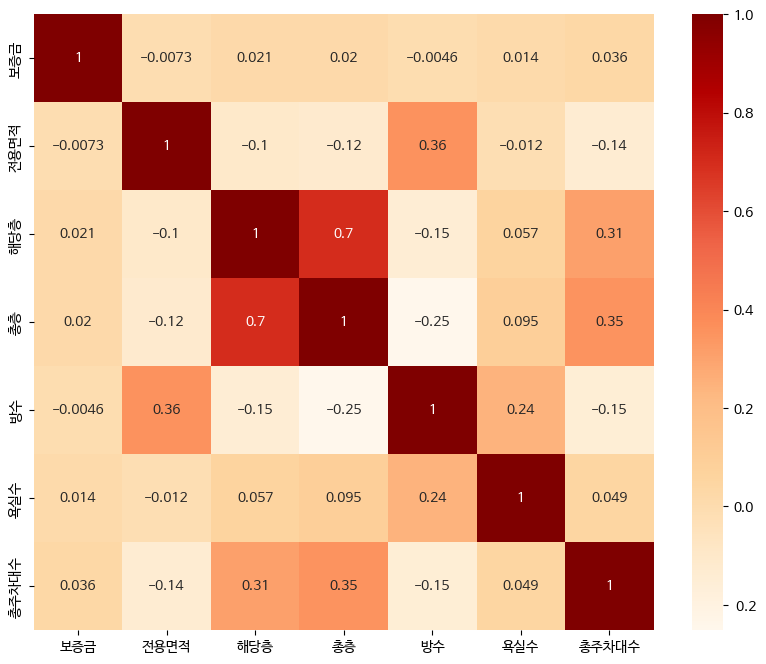

In [ ]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처
plt.figure(figsize = (10, 8))
cont_corr = data[cont_features].corr() # 연속형 피처 간 상관관계
sns.heatmap(cont_corr, annot = True, cmap = 'OrRd'); # 히트맵 그리기